In [7]:
# Import libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import matplotlib .pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



In [8]:
df =pd.read_csv('telcom_data.csv')

In [9]:
df.shape

(150001, 55)

In [10]:
df.describe

<bound method NDFrame.describe of            Bearer Id             Start  Start ms               End  End ms  \
0       1.311450e+19  04-04-2019 12:01     770.0  25-04-2019 14:35   662.0   
1       1.311450e+19  09-04-2019 13:04     235.0  25-04-2019 08:15   606.0   
2       1.311450e+19  09-04-2019 17:42       1.0  25-04-2019 11:58   652.0   
3       1.311450e+19  10-04-2019 00:31     486.0  25-04-2019 07:36   171.0   
4       1.311450e+19  12-04-2019 20:10     565.0  25-04-2019 10:40   954.0   
...              ...               ...       ...               ...     ...   
149996  7.277830e+18  29-04-2019 07:28     451.0  30-04-2019 06:02   214.0   
149997  7.349880e+18  29-04-2019 07:28     483.0  30-04-2019 10:41   187.0   
149998  1.311450e+19  29-04-2019 07:28     283.0  30-04-2019 10:46   810.0   
149999  1.311450e+19  29-04-2019 07:28     696.0  30-04-2019 10:40   327.0   
150000           NaN               NaN       NaN               NaN     NaN   

        Dur. (ms)          IM

In [14]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [17]:
df.nunique()

Bearer Id                                        9
Start                                         9997
Start ms                                      1000
End                                           6403
End ms                                        1000
Dur. (ms)                                    89525
IMSI                                             8
MSISDN/Number                               106856
IMEI                                          3852
Last Location Name                           45036
Avg RTT DL (ms)                               2130
Avg RTT UL (ms)                                722
Avg Bearer TP DL (kbps)                      41753
Avg Bearer TP UL (kbps)                      14528
TCP DL Retrans. Vol (Bytes)                  54399
TCP UL Retrans. Vol (Bytes)                  35120
DL TP < 50 Kbps (%)                            100
50 Kbps < DL TP < 250 Kbps (%)                  84
250 Kbps < DL TP < 1 Mbps (%)                   73
DL TP > 1 Mbps (%)             

In [18]:
df.dtypes

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

In [19]:
df={"Xdr_Session":df["Bearer Id"],
  "Dur_msec":df["Dur. (ms)"],
   "MSISDN/Number":df["MSISDN/Number"],
  "Activity Duration DL (ms)":df["Activity Duration DL (ms)"],
  "Activity Duration UL (ms)":df["Activity Duration UL (ms)"],
  "Social Media DL (Bytes)":df["Social Media DL (Bytes)"],
  "Social Media UL (Bytes)":df["Social Media UL (Bytes)"],
  "Google DL (Bytes)":df["Google DL (Bytes)"],
  "Google UL (Bytes)":df["Google UL (Bytes)"],
  "Email DL (Bytes)":df["Email DL (Bytes)"],
  "Email UL (Bytes)":df["Email UL (Bytes)"],
  "Youtube DL (Bytes)":df["Youtube DL (Bytes)"],
  "Youtube UL (Bytes)":df["Youtube UL (Bytes)"],
  "Netflix DL (Bytes)":df["Netflix DL (Bytes)"],
  "Netflix UL (Bytes)":df["Netflix UL (Bytes)"],
  "Gaming DL (Bytes)":df["Gaming DL (Bytes)"],
  "Gaming UL (Bytes)":df["Gaming UL (Bytes)"],
  "Other DL (Bytes)":df["Other DL (Bytes)"],
  "Other UL (Bytes)":df["Other UL (Bytes)"],
  "Total UL (Bytes)":df["Total UL (Bytes)"],
  "Total DL (Bytes)":df["Total DL (Bytes)"]}

In [20]:
data=pd.DataFrame(df)

In [21]:
data

,Xdr_Session,Dur_msec,MSISDN/Number,Activity Duration DL (ms),Activity Duration UL (ms),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,1823652.0,3.366496e+10,37624.0,38787.0,1545765.000,24420.00000,1634479.000,1271433.000,3563542.000,...,15854611.0,2501332.00,8198936.00,9656251.00,278082303.0,1.434415e+07,171744450.0,8.814393e+06,36749741.0,308879636.0
1,1.311450e+19,1365104.0,3.368185e+10,168.0,3560.0,1926113.000,7165.00000,3493924.000,920172.000,629046.000,...,20247395.0,19111729.00,18338413.00,17227132.00,608750074.0,1.170709e+06,526904238.0,1.505514e+07,53800391.0,653384965.0
2,1.311450e+19,1361762.0,3.376063e+10,0.0,0.0,1684053.000,42224.00000,8535055.000,1694064.000,2690151.000,...,19725661.0,14699576.00,17587794.00,6163408.00,229584621.0,3.956300e+05,410692588.0,4.215763e+06,27883638.0,279807335.0
3,1.311450e+19,1321509.0,3.375034e+10,3330.0,37882.0,644121.000,13372.00000,9023734.000,2788027.000,1439754.000,...,21388122.0,15146643.00,13994646.00,1097942.00,799538153.0,1.084972e+07,749039933.0,1.279728e+07,43324218.0,846028530.0
4,1.311450e+19,1089009.0,3.369980e+10,0.0,0.0,862600.000,50188.00000,6248284.000,1500559.000,1936496.000,...,15259380.0,18962873.00,17124581.00,415218.00,527707248.0,3.529801e+06,550709500.0,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277830e+18,81230.0,3.365069e+10,42376.0,41915.0,3464974.000,52091.00000,9967603.000,2817311.000,57639.000,...,16191667.0,11763428.00,17883703.00,19678161.00,526609673.0,9.197207e+06,3264510.0,1.348742e+07,57628851.0,574175259.0
149997,7.349880e+18,97970.0,3.366345e+10,17264.0,16759.0,2344568.000,7613.00000,2229420.000,2185941.000,1954414.000,...,13877234.0,8288284.00,19350146.00,21293148.00,626893062.0,4.735033e+06,712180387.0,2.457758e+06,39135081.0,666648844.0
149998,1.311450e+19,98249.0,3.362189e+10,25003.0,28640.0,1245845.000,14394.00000,3850890.000,2734579.000,1525734.000,...,22660510.0,1855903.00,9963942.00,5065760.00,553539484.0,1.339432e+07,121100856.0,1.131473e+07,34912224.0,592786405.0
149999,1.311450e+19,97910.0,3.361962e+10,13405.0,34088.0,801547.000,21562.00000,4189773.000,3567494.000,2228270.000,...,8817106.0,8305402.00,3322253.00,13172589.00,352536971.0,2.529475e+06,814713113.0,1.406930e+06,29626096.0,371895920.0


# Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric

In [22]:
# Calculate engagement metrics: total data usage and session duration

data['Total Data Usage'] = data['Total UL (Bytes)'] + data['Total DL (Bytes)']
data['Session Duration'] = data['Dur_msec']

# Group the data by customer ID (MSISDN) and calculate sum of engagement metrics
grouped_data = data.groupby('MSISDN/Number').agg({
    'Total Data Usage': 'sum',
    'Session Duration': 'sum'
})

# Sort the customers based on the engagement metric in descending order
sorted_data = grouped_data.sort_values(by='Total Data Usage', ascending=False)

# top 10 customers
top_10_customers = sorted_data.head(10)

print(top_10_customers)      

               Total Data Usage  Session Duration
MSISDN/Number                                    
3.361489e+10       8.846226e+09         9966898.0
3.376054e+10       8.514774e+09         9279434.0
3.362578e+10       8.499621e+09        18553754.0
3.362632e+10       7.971167e+09         8791927.0
3.367588e+10       7.891111e+09         4865947.0
3.365973e+10       7.705863e+09         4035428.0
3.366646e+10       7.308501e+09         4536757.0
3.376041e+10       7.132371e+09         5321667.0
3.366471e+10       6.872018e+09         2927785.0
3.369879e+10       6.540899e+09         5169128.0


Normalize each engagement metric and run a k-means (k=3) to classify customers into three groups of engagement.

In [23]:
#Import the neccesary scikit-learn library

import pandas as pd
from sklearn.cluster import KMeans               # KMeans used for clustering data into groups.
from sklearn.preprocessing import MinMaxScaler   # MinMaxScaler is used for scaling features.
from sklearn.impute import SimpleImputer         # SimpleInputer is used for handling missing values.

# Select the engagement metrics for clustering
engagement_metrics = ['Total Data Usage', 'Session Duration']

# Handle missing values by imputing with the mean value
imputer = SimpleImputer(strategy='mean')
data[engagement_metrics] = imputer.fit_transform(data[engagement_metrics])

# Normalize the engagement metrics using Min-Max scaling
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[engagement_metrics])

# Run k-means clustering (k=3)               
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original data
data['Cluster'] = kmeans.labels_

# Print the cluster assignments for each customer
print(data[['MSISDN/Number', 'Cluster']])

        MSISDN/Number  Cluster
0        3.366496e+10        0
1        3.368185e+10        1
2        3.376063e+10        0
3        3.375034e+10        1
4        3.369980e+10        2
...               ...      ...
149996   3.365069e+10        2
149997   3.366345e+10        1
149998   3.362189e+10        2
149999   3.361962e+10        2
150000            NaN        2

[150001 rows x 2 columns]


After applying the K-means clustering algorithm to the engagement metrics data, we have successfully classified the customers into three groups of engagement. The clustering analysis provides insights into customer behavior based on their engagement patterns.

After applying the K-means clustering algorithm to the engagement metrics data, we have successfully classified the customers into three groups of engagement. The clustering analysis provides insights into customer behavior based on their engagement patterns.

Cluster 0: This group represents customers with low engagement. They have relatively lower total data usage and shorter session durations compared to the other clusters. These customers may have minimal usage of various online services.

Cluster 1: This group represents customers with moderate engagement. They exhibit moderate levels of total data usage and session durations. These customers may have moderate usage of different online services.

Cluster 2: This group represents customers with high engagement. They have significantly higher total data usage and longer session durations compared to the other clusters. These customers are likely heavy users of various online services.

## Compute the Minimum, Maximum, Average & Total non-normalized metrics for each cluster.


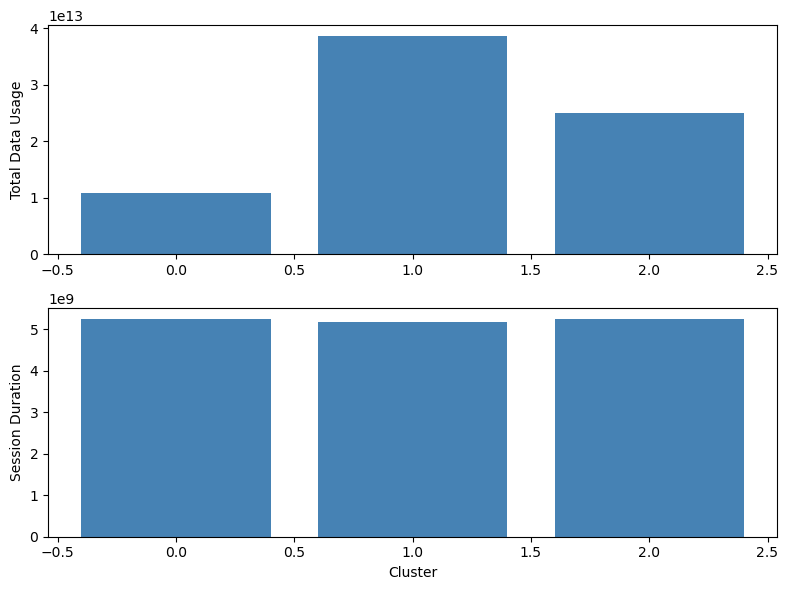

        Total Data Usage                                           \
                     min          max          mean           sum   
Cluster                                                             
0             28956107.0  356933484.0  2.142937e+08  1.077683e+13   
1            639155788.0  955984776.0  7.788818e+08  3.859126e+13   
2            356783538.0  639171719.0  4.983077e+08  2.499711e+13   

        Session Duration                                          
                     min        max           mean           sum  
Cluster                                                           
0                 7189.0  1859336.0  104518.764426  5.256249e+09  
1                 7146.0  1859327.0  104496.649222  5.177495e+09  
2                 7142.0  1772931.0  104809.116469  5.257645e+09  


In [24]:
metrics_summary = data.groupby('Cluster')[engagement_metrics].agg(['min', 'max', 'mean', 'sum'])

# Plot the metrics summary
fig, axes = plt.subplots(len(engagement_metrics), 1, figsize=(8, 6))
for i, metric in enumerate(engagement_metrics):
    axes[i].bar(metrics_summary.index, metrics_summary[metric]['sum'], color='steelblue')
    axes[i].set_ylabel(metric)
plt.xlabel('Cluster')
plt.tight_layout()
plt.show()

# Print the metrics summary
print(metrics_summary)

### Aggregate user total traffic per application and derive the top 10 most engaged users per application

In [25]:
# Define the list of applications to aggregate
applications = ['Social Media DL (Bytes)','Social Media UL (Bytes)','Google DL (Bytes)','Google UL (Bytes)','Email DL (Bytes)','Email UL (Bytes)','Youtube DL (Bytes)','Youtube UL (Bytes)','Netflix DL (Bytes)','Netflix UL (Bytes)','Gaming DL (Bytes)','Gaming UL (Bytes)', 'Other DL (Bytes)','Other UL (Bytes)']

# Calculate the total traffic per application for each user
total_traffic_per_user = data.groupby('MSISDN/Number')[applications].sum()

# Derive the top 10 most engaged users per application
top_10_per_application = {}
for app in applications:
    top_10_per_application[app] = total_traffic_per_user.nlargest(10, app)

# Print the top 10 most engaged users per application
for app, top_10_users in top_10_per_application.items():
    print(f"Top 10 users for {app}:")
    print(top_10_users)

Top 10 users for Social Media DL (Bytes):
               Social Media DL (Bytes)  Social Media UL (Bytes)  \
MSISDN/Number                                                     
3.362632e+10                42743837.0                 630942.0   
3.376054e+10                39297646.0                 485543.0   
3.365973e+10                34900444.0                 511914.0   
3.361489e+10                27749744.0                 544800.0   
3.362578e+10                26564121.0                 571379.0   
3.366716e+10                23753753.0                 494097.0   
3.378632e+10                23568655.0                 406264.0   
3.366907e+10                23477047.0                 323787.0   
3.360313e+10                22776679.0                 301146.0   
3.365849e+10                22695673.0                 304393.0   

               Google DL (Bytes)  Google UL (Bytes)  Email DL (Bytes)  \
MSISDN/Number                                                           
3.36263

## Top 3 most used applications using appropriate charts

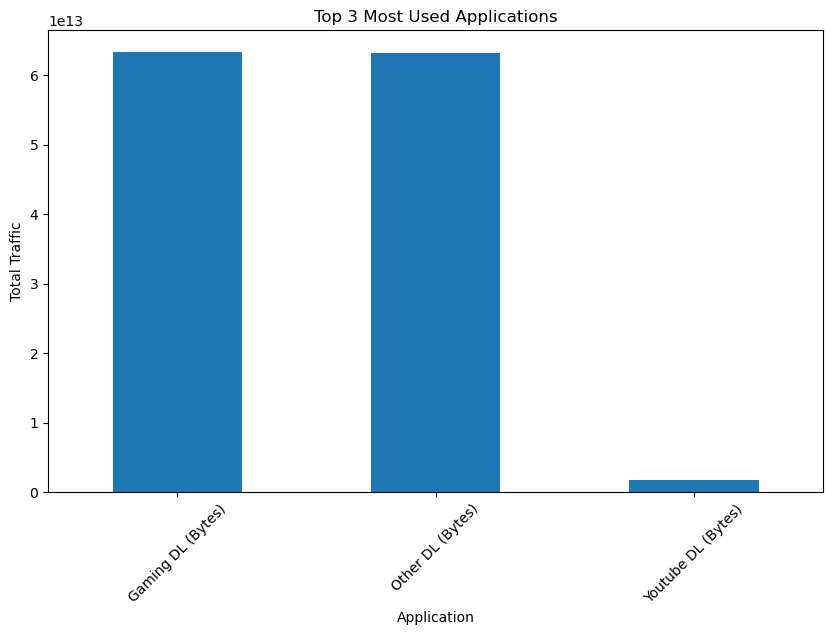

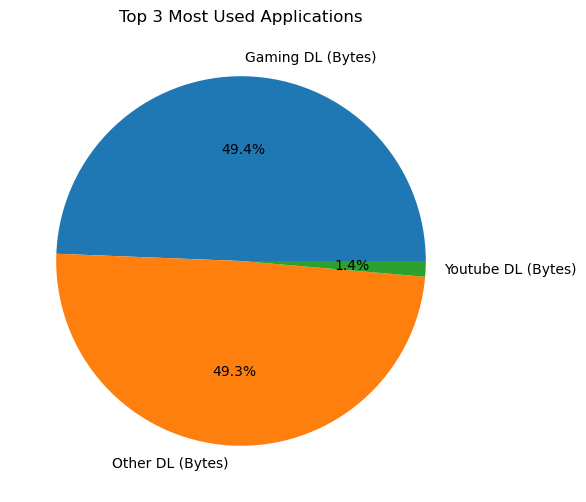

In [26]:
# Calculate the total traffic per application
total_traffic_per_application = data[applications].sum()

# Get the top 3 most used applications
top_3_applications = total_traffic_per_application.nlargest(3)

# Plot as a bar plot
plt.figure(figsize=(10, 6))
top_3_applications.plot(kind='bar')
plt.xlabel('Application')
plt.ylabel('Total Traffic')
plt.title('Top 3 Most Used Applications')
plt.xticks(rotation=45)
plt.show()

# Plot as a pie chart
plt.figure(figsize=(6, 6))
top_3_applications.plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 3 Most Used Applications')
plt.ylabel('')
plt.show()

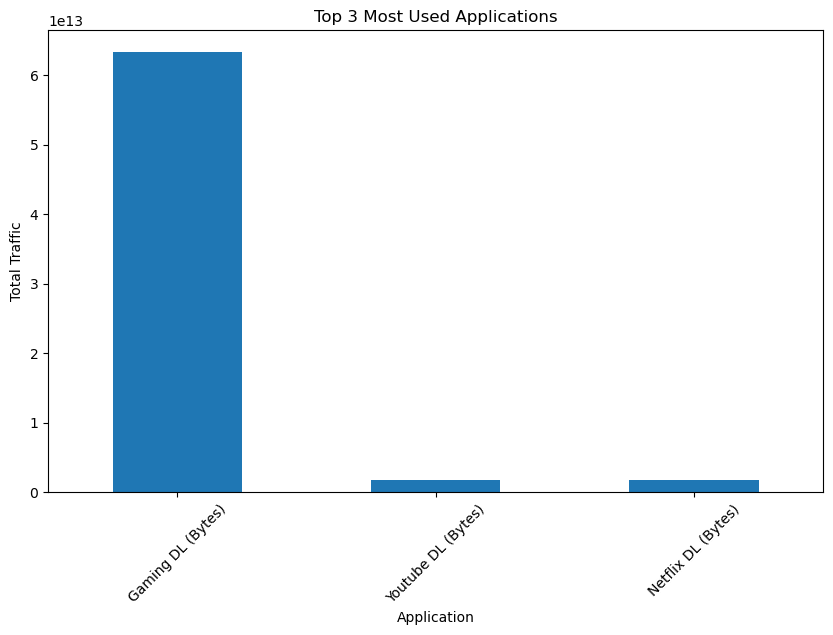

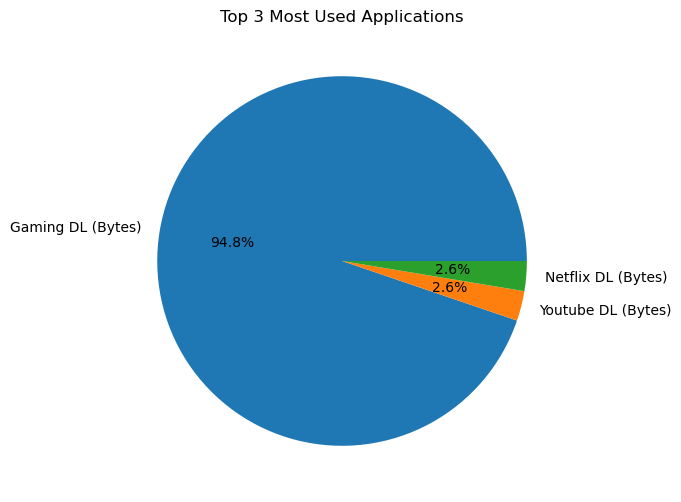

In [27]:
applications = ['Social Media DL (Bytes)','Social Media UL (Bytes)','Google DL (Bytes)','Google UL (Bytes)','Email DL (Bytes)','Email UL (Bytes)','Youtube DL (Bytes)','Youtube UL (Bytes)','Netflix DL (Bytes)','Netflix UL (Bytes)','Gaming DL (Bytes)','Gaming UL (Bytes)']
# Calculate the total traffic per application
total_traffic_per_application = data[applications].sum()

# Get the top 3 most used applications
top_3_applications = total_traffic_per_application.nlargest(3)

# Plot as a bar plot
plt.figure(figsize=(10, 6))
top_3_applications.plot(kind='bar')
plt.xlabel('Application')
plt.ylabel('Total Traffic')
plt.title('Top 3 Most Used Applications')
plt.xticks(rotation=45)
plt.show()

# Plot as a pie chart
plt.figure(figsize=(6, 6))
top_3_applications.plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 3 Most Used Applications')
plt.ylabel('')
plt.show()

#### Using the k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics:        Optimized value of K using Albow Method

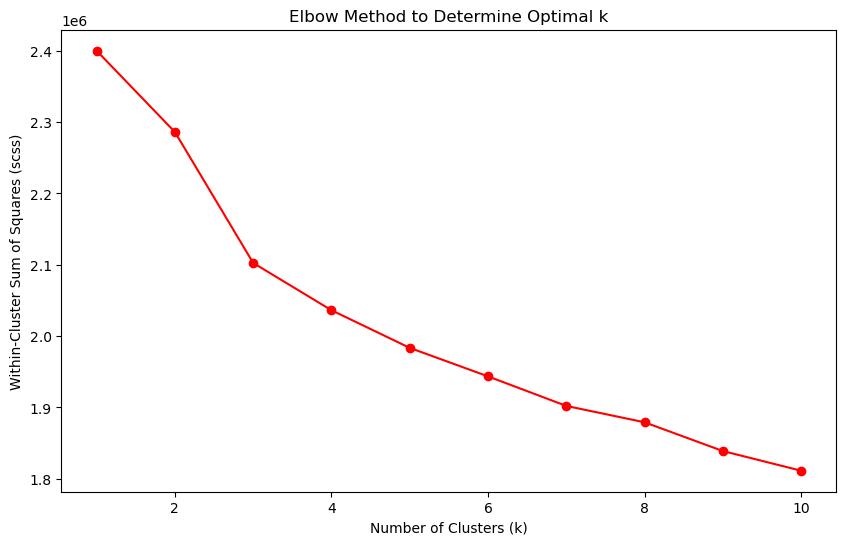

In [36]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Select the engagement metrics for clustering
engagement_metrics = ['Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)']

# Drop any rows with missing values in engagement metrics
data_cleaned = data.dropna(subset=engagement_metrics)

# Imput missing values in the engagement metrics using mean 
imputer = SimpleImputer(strategy='mean')
data_cleaned[engagement_metrics] = imputer.fit_transform(data_cleaned[engagement_metrics])

# data Standardization
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned[engagement_metrics])

# Initialize the list to store the values of scss
scss = []

# Calculate scss for different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    scss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), scss, marker='o', linestyle='-', color='r')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (scss)')
plt.title('Elbow Method to Determine Optimal k')
plt.show()


The elbow method is a common technique to determine the optimal number of clusters (k) in k-means clustering. By plotting the within-cluster sum of squares (SCSS) against different values of k, we can identify the "elbow" point where the rate of decrease in WCSS slows down significantly. This point indicates the optimal value of k, where adding more clusters does not provide much improvement.

Cluster Means:
         Activity Duration DL (ms)  Activity Duration UL (ms)  \
Cluster                                                         
0                     9.703080e+05               7.397929e+05   
1                     9.411520e+05               7.144386e+05   
2                     2.618515e+07               2.041979e+07   

         Social Media DL (Bytes)  Social Media UL (Bytes)  Google DL (Bytes)  \
Cluster                                                                        
0                   1.799358e+06             32804.923108       5.758221e+06   
1                   1.789738e+06             33062.818212       5.746551e+06   
2                   1.816861e+06             32777.960909       5.705158e+06   

         Google UL (Bytes)  Email DL (Bytes)  Email UL (Bytes)  \
Cluster                                                          
0             2.037634e+06      1.790427e+06     467776.797020   
1             2.075861e+06      1.793091e+06     466708.2177

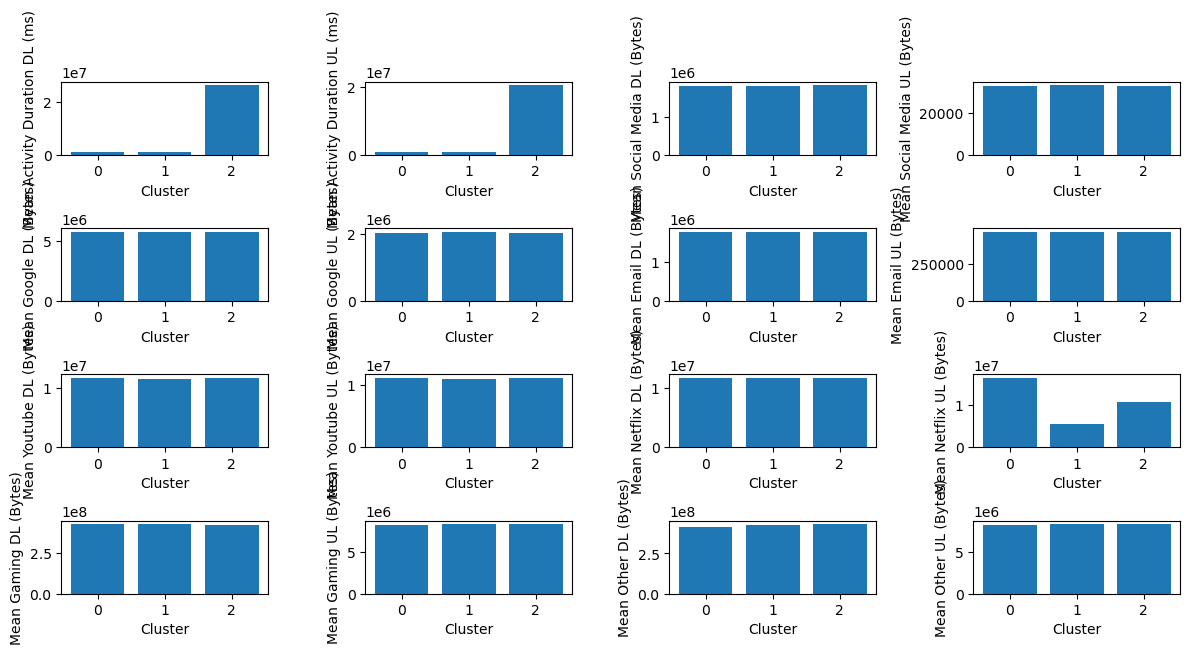

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Select the engagement metrics for clustering
engagement_metrics = ['Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)']

# Drop any rows with missing values in engagement metrics
data_cleaned = data.dropna(subset=engagement_metrics)

# Impute missing values in the engagement metrics using mean strategy
imputer = SimpleImputer(strategy='mean')
data_cleaned[engagement_metrics] = imputer.fit_transform(data_cleaned[engagement_metrics])

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned[engagement_metrics])

# Perform k-means clustering with optimized k
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_scaled)

# Assign clusters to the data
data_cleaned['Cluster'] = kmeans.labels_

# Interpret the findings
cluster_means = data_cleaned.groupby('Cluster')[engagement_metrics].mean()

# Print the cluster means
print("Cluster Means:")
print(cluster_means)

# Visualize the cluster means
plt.figure(figsize=(12, 6))
for i, metric in enumerate(engagement_metrics):
    plt.subplot(4, 4, i + 1)
    plt.bar(cluster_means.index, cluster_means[metric])
    plt.xlabel('Cluster')
    plt.ylabel('Mean ' + metric)
plt.tight_layout()
plt.show()